## CLUSTERING

Data Mining in Python

# Data Mining Topic Clustering with k-Means, DBSCAN, and Hierarchical Methods

Introduction:

Greetings! In this Jupyter Notebook, we embark on an exploration of data mining techniques specifically tailored for topic clustering. Clustering, a fundamental task in unsupervised learning, allows us to unveil hidden patterns and group similar instances within our dataset. In this notebook, we focus on three powerful clustering algorithms: k-Means, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Hierarchical clustering.

Objective:
The primary goal of this analysis is to showcase the efficiency and distinct characteristics of various clustering methods in grouping textual data based on inherent similarities. By employing these algorithms, we aim to uncover underlying structures within our dataset, shedding light on the inherent relationships among different topics.

Methods:

k-Means: We kick off our exploration with the classic k-Means algorithm, a partitioning method that iteratively assigns instances to clusters based on their proximity to the cluster centroid.

DBSCAN: Next, we delve into the world of density-based clustering using DBSCAN, a method capable of identifying clusters of arbitrary shapes by grouping dense regions while considering noise.

Hierarchical Clustering: Finally, we venture into the hierarchical realm, constructing dendrograms that illustrate the hierarchical relationships among topics based on their similarities.

In [34]:
import pandas as pd                                      # For dataframes
import matplotlib.pyplot as plt                          # For plotting data
import seaborn as sns                                    # For plotting data
from sklearn.cluster import AgglomerativeClustering      # For clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # For clustering and visualization
from sklearn.cluster import DBSCAN                       # For DBSCAN
import numpy as np                                       # For various computations
from sklearn.preprocessing import StandardScaler         # For standardizing data
from sklearn.neighbors import NearestNeighbors           # For nearest neighbors
from sklearn.cluster import KMeans                       # For k-Means
from sklearn.model_selection import GridSearchCV         # For grid search
from sklearn.metrics import silhouette_score             # For metrics and scores




# LOAD AND PREPARE DATA
Read the `penguins.csv` file from the `data` directory into variable `df`. Select a random sample of 75 cases of the dataset for easy visualization. Keep all features in variable `df` and store the class variable in `y`.

In [12]:
# Reads the .csv file into variable df
df = pd.read_csv('/content/penguins.csv')

# Selects a random sample of 75 cases
df = df.sample(n=75, random_state=1)

# Separates the class variable in y
y = df.y

# Removes the y column from df
df = df.drop('y', axis=1)

# Displays the first 5 rows of df
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
102,37.8,20.0,190.0,4250.0
125,38.8,17.6,191.0,3275.0
11,41.1,17.6,182.0,3200.0
248,46.9,14.6,222.0,4875.0
238,51.3,14.2,218.0,5300.0


In [22]:
from palmerpenguins import load_penguins

# Load the penguins dataset
df = load_penguins()

# Perform data manipulation
df = df.drop(['island', 'year', 'sex'], axis=1) \
    .dropna() \
    .rename(columns={'species': 'y'})

# Display the first 5 rows of data
df.head(25)

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
6,Adelie,38.9,17.8,181.0,3625.0
7,Adelie,39.2,19.6,195.0,4675.0
8,Adelie,34.1,18.1,193.0,3475.0
9,Adelie,42.0,20.2,190.0,4250.0
10,Adelie,37.8,17.1,186.0,3300.0


## Scatter Plots and Density Plots for Feature Pairs
Plot the relationships between all features using `PairGrid`. In particular, notice how `bill_length_mm` and `bill_depth_mm` variables are good at distinguishing between the species.

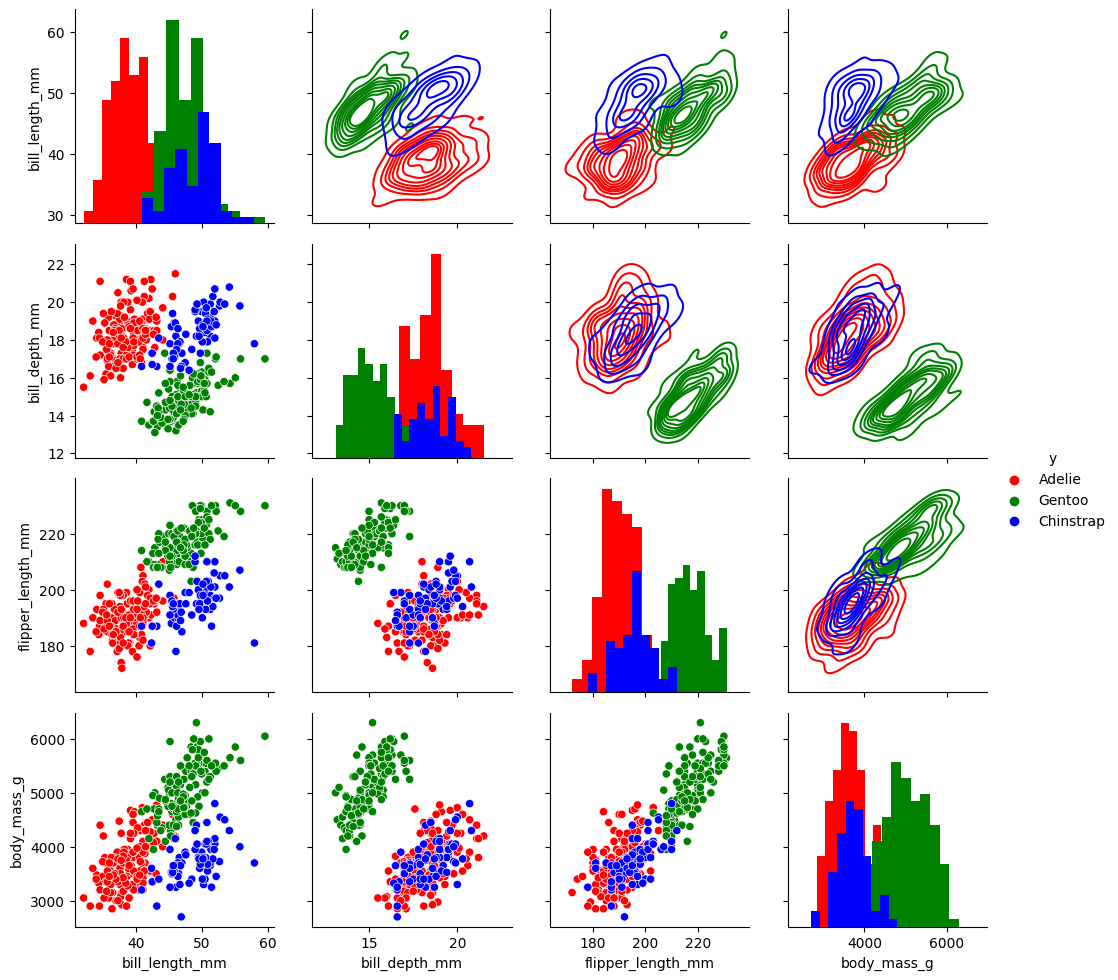

In [15]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    df,
    vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    hue='y',
    diag_sharey=False,
    palette=["red", "green", "blue"])

# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend()

# HIERARCHICAL CLUSTERING
In this demonstration, we'll use `SciPy` to perform hierarchical clustering. (Another common choice is `scikit-learn`.)

The `scipy.cluster.hierarchy` package contains two functions, i.e., `linkage()` and `dendogram()` for hierarchical clustering. The `linkage()` function performs agglomerative clustering and the `dendogram()` function displays the clusters. Various `linkage` methods are possible. Here we'll use the `ward` linkage method that merges clusters so that variance of the clusters is minimized. Other linkage options are:

- `average`
- `single`
- `complete`

The `linkage()` function returns a linkage matrix with information about clusters. This matrix can be viewed using the `dendogram()` function. The code below performs clustering using the `euclidean` metric and displays the clusters.

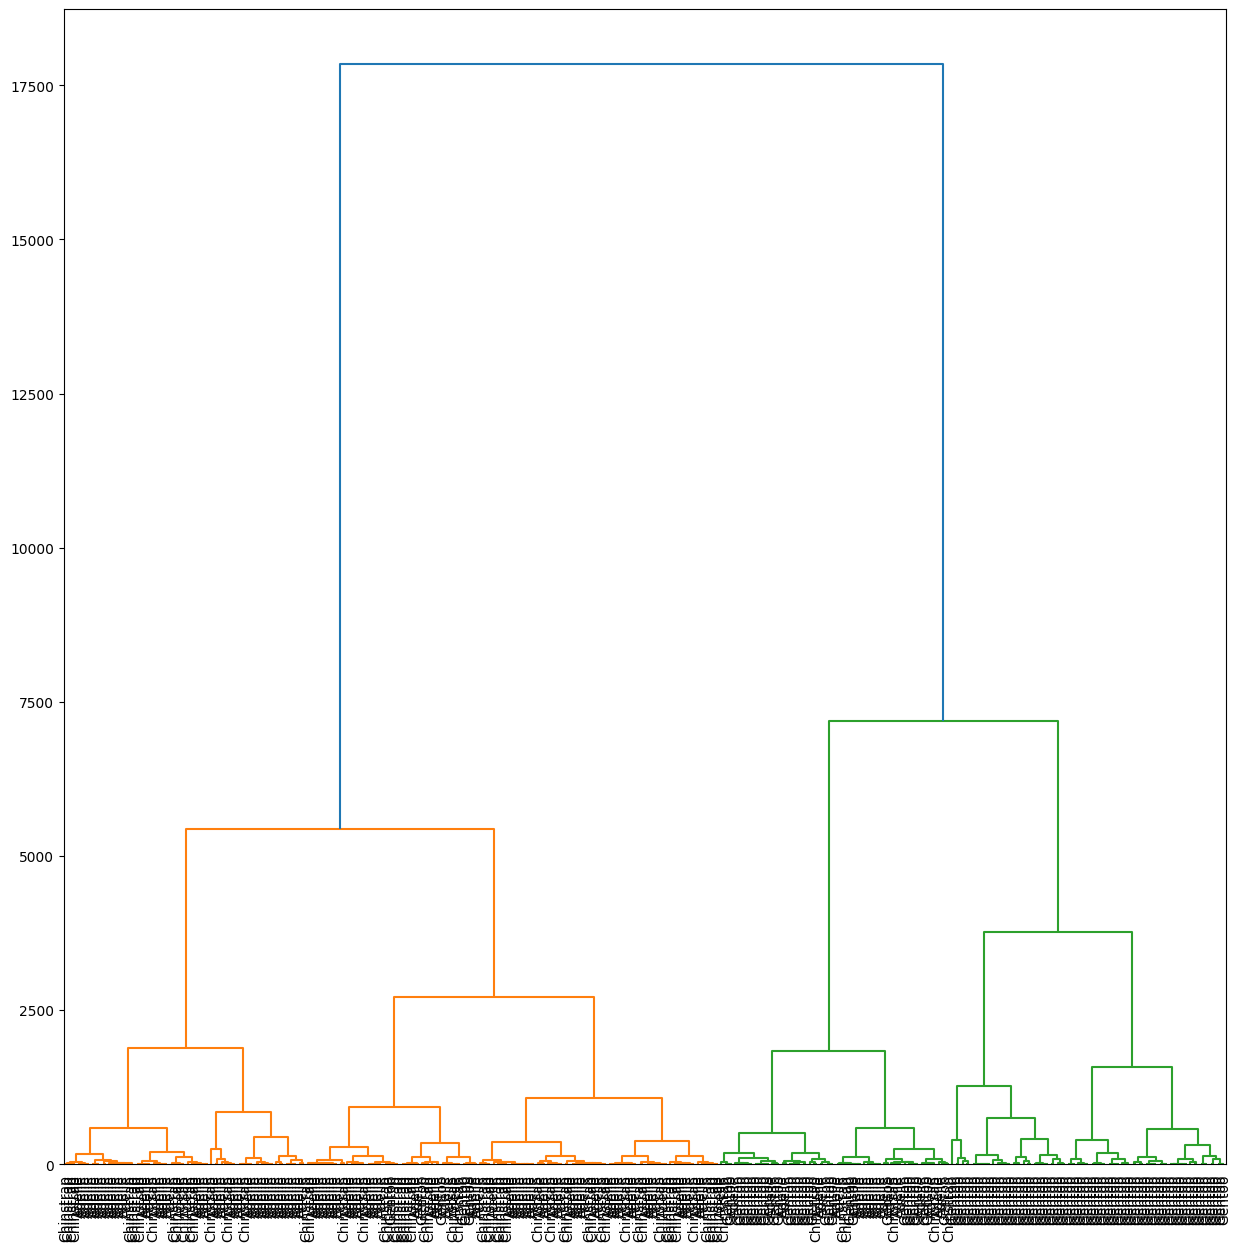

In [19]:
# Copy the DataFrame to avoid modifying the original dataset
df_encoded = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical 'y' column
df_encoded['y'] = label_encoder.fit_transform(df['y'])

# Now, perform hierarchical clustering on the encoded DataFrame
hc = linkage(df_encoded.drop('y', axis=1), method='ward', metric='euclidean')

# Set the figure size
fig = plt.figure(figsize=(15, 15))

# Display the dendrogram
dn = dendrogram(
    hc,
    leaf_label_func=lambda id: df['y'].values[id],
    leaf_font_size=10)

# RUNNING k-MEANS

## k-Means: Train the Model
We'll set up a `KMeans` object with the following parameters:

- `n_clusters`: Total number of clusters to make.
- `random_state`: Set to one to reproduce these results.
- `init`: How to initialize the k-means centers; we'll use `k-means++`.
- `n_init`: Number of times k-means would be run; the model returned would have the minimum value of `inertia`.

A few attributes of the `KMeans` object, which are also used in this demo are:
- `cluster_centers_`: Stores the discovered cluster centers.
- `labels_`: Label of each instance.
- `inertia`: Sum of square of distances of each instance from its corresponding center.
- `n_iter`: Number of iterations run to find the centers.

In [27]:
# Reads the .csv file into variable df
df = pd.read_csv('/content/penguins.csv')

# Separates the class variable in y
y = df.y

# Removes the y column from df
df = df.drop('y', axis=1)

# Standardizes df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

# Displays the first 5 rows of df
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [29]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()





{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

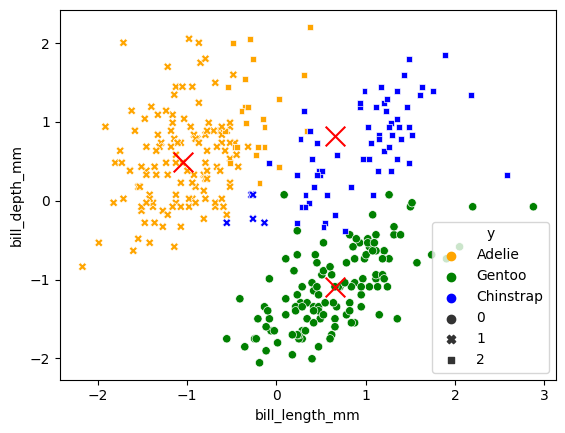

In [30]:
# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    data=df,
    hue=y,
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

## Plot of Scores for Different Number of Clusters
The `grid` object has an attribute `cv_results_` through which the scores for different `n_clusters` can be accessed.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Silhouette Score')

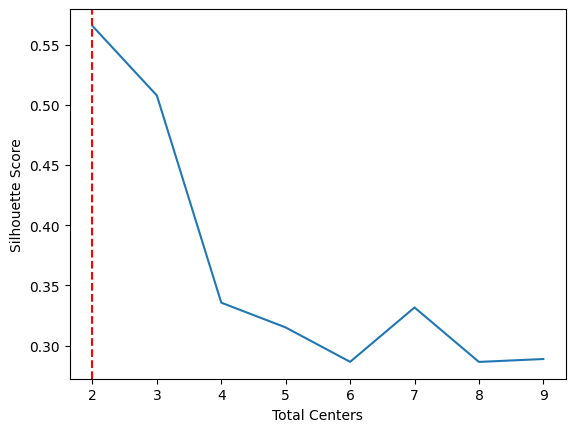

In [32]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,10)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(df)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters,
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')


# MODEL WITH 2 CLUSTERS

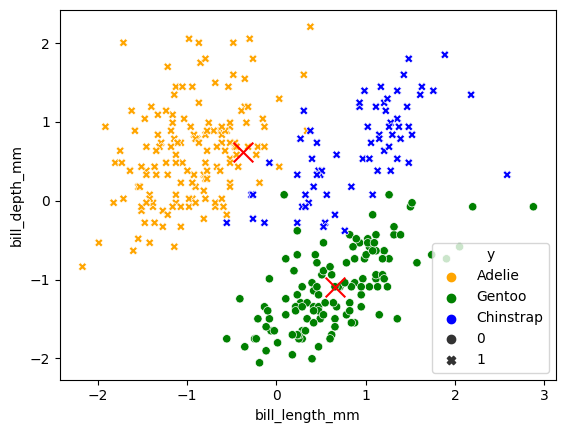

In [33]:
# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    data=df,
    hue=y,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='x',
    s=200,
    c='red')

# DBSCAN: CLUSTERING DATA
There are two steps for running DBSCAN. In the first step, we'll determine the parameter values and in the second step, we'll fit the model to data.

## Step 1: Determine the Parameters
For DBSCAN clustering, we need two parameters:
- `min_samples`: Minimum number of neighboring points for clustering.
- `eps`: Epsilon neighborhood radius

To find the optimal value of `eps`, we'll construct a plot of distances of `min_samples` (variable `k` in code below) nearest neighbors and look for a pronounced bend, also called a "knee." The code below uses the `NearestNeighbors` object to find the distances and plots them.

## Step 2: Fit the Model
Create a DBSCAN object with the parameters found and visualize the clusters. Each point is colored according to its actual label. For comparison, each instance is drawn with a marker according to the label found by the clustering algorithm.

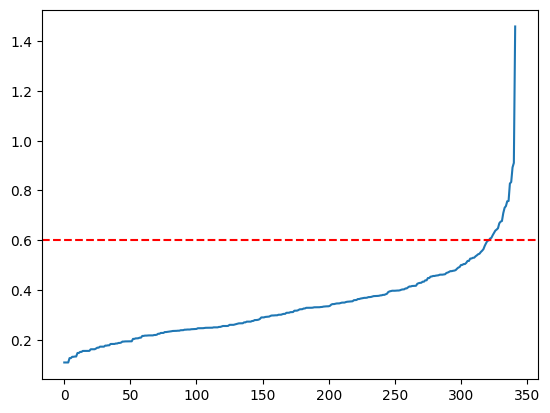

In [35]:
k = 7

# Fits a NearestNeighbors object to df
nn = NearestNeighbors(n_neighbors=k) \
    .fit(df)

# Finds the distance of k closest neighbors
dist, ind = nn.kneighbors(df)

# Sorts the distances
dist = np.sort(dist, axis=0)[:,1]

# Plots the distances
plt.plot(dist)

# Draws a horizontal line at the bend
plt.axhline(y=.6, color='red', ls='--')


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

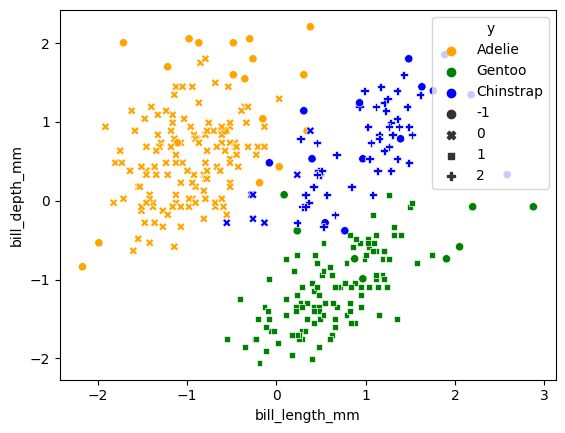

In [36]:
# Fits a DBSCAN object to df
db=DBSCAN(eps=0.6, min_samples=k) \
    .fit(df)

# Creates a scatter plot to visualize the clusters
sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    data=df,
    hue=y,
    style=db.labels_,
    palette=['orange', 'green', 'blue'])